In [10]:
import pandas as pd
%pip install seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [11]:
def load_dataset():
    df = pd.read_csv('googleplaystore.csv')
    return df
df = load_dataset()

In [12]:
def print_summarize_dataset(dataset):
    col,row = df.shape
    print(f"there are {col} columns, {row} rows in google_play_store_data")
    print(df.head())
    print(df.loc[3])
    print(dataset.info())
print_summarize_dataset(df)

there are 10841 columns, 13 rows in google_play_store_data
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   Janu

In [13]:
def clean_dataset(dataset):
    #There are nan values
    print(dataset.isnull().sum(axis = 0),'\n')
    clean = dataset.dropna().drop_duplicates()
    print("After cleaning nan values:")
    print(clean.isnull().sum(axis=0))
    chars_to_remove = ["+", ",", "$"]
    for char in chars_to_remove:
        dataset['Price'] = dataset['Price'].apply(lambda x: x.replace(char, ''))
        dataset['Installs'] = dataset['Installs'].apply(lambda x: x.replace(char, ''))
    # print(dataset[dataset["Price"] == "Everyone"])
    # print(dataset[dataset["Installs"] == "Free"])
    dataset.drop(index=10472, inplace=True)
    dataset.reset_index(inplace=True)
    dataset['Price']=dataset['Price'].astype('float')
    dataset["Reviews"] = dataset["Reviews"].astype('float')
    dataset["Installs"] = dataset["Installs"].astype('float')

    dataset = dataset.reset_index(drop=True)
    print(dataset.info())
data = clean_dataset(df)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64 

After cleaning nan values:
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          9366 non-null   float64
 4   Re

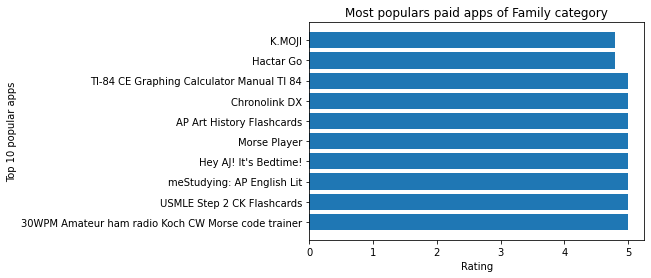

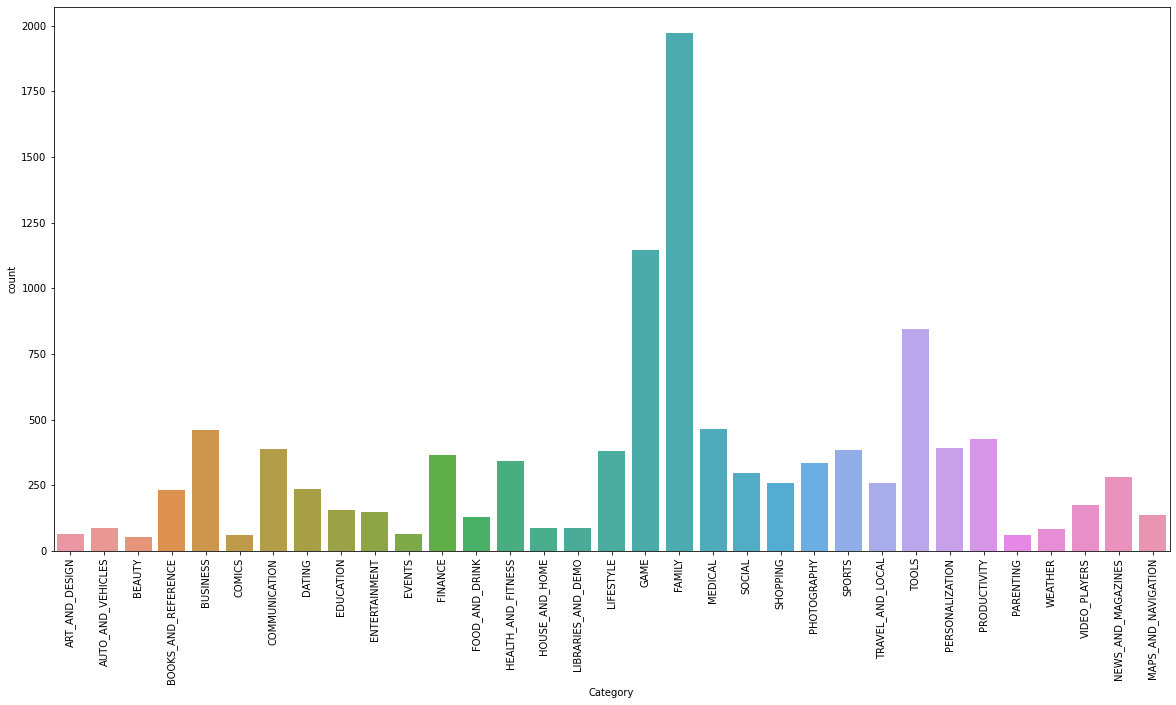

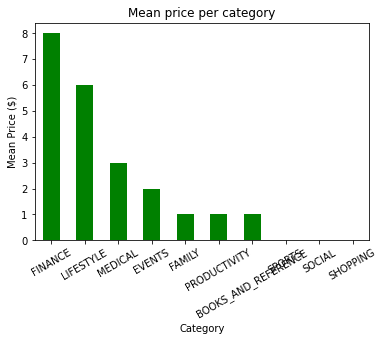

Most expensive apps per category

{'LIFESTYLE': 400.0, 'FAMILY': 399.99, 'FINANCE': 399.99, 'MEDICAL': 200.0, 'PRODUCTIVITY': 154.99, 'EVENTS': 109.99, 'BUSINESS': 89.99, 'SPORTS': 29.99, 'PHOTOGRAPHY': 29.99, 'TOOLS': 25.99}


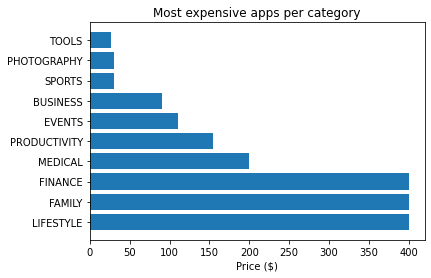




App         I'm Rich - Trump Edition
Category                   LIFESTYLE
Price                            400
dtype: object
App         💎 I'm rich
Category     LIFESTYLE
Price           399.99
dtype: object
App         EP Cook Book
Category         MEDICAL
Price                200
dtype: object
App         cronometra-br
Category     PRODUCTIVITY
Price              154.99
dtype: object
App         BP Fitness Lead Scanner
Category                     EVENTS
Price                        109.99
dtype: object
App          Lean EQ
Category    BUSINESS
Price          89.99
dtype: object
App         PTA Content Master
Category                SPORTS
Price                    29.99
dtype: object
App         G-NetReport Pro
Category              TOOLS
Price                 25.99
dtype: object


In [14]:
def print_histograms(dataset):
    paid = dataset[dataset["Type"] == "Paid"]
    v = paid.groupby("Category")
    ans = v.get_group('FAMILY')
    a = dict(ans.groupby("App").Rating.max().sort_values(ascending=False).head(10))
    v = list(a.keys())
    r = list(a.values())
    plt.barh(v,r)
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.title("Most populars paid apps of Family category")
    plt.xlabel("Rating")
    plt.ylabel("Top 10 popular apps")
    plt.show()
    #let's know how much apps we have in the categories
    plt.figure(figsize=(20,10))
    ax=sns.countplot(x="Category",data=df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()
    plotdata = pd.DataFrame(
        {"pies": [8, 6, 3,2, 1, 1, 1, 0, 0, 0]},
        index=['FINANCE', 'LIFESTYLE', 'MEDICAL', 'EVENTS', 'FAMILY', 'PRODUCTIVITY', 'BOOKS_AND_REFERENCE', 'SPORTS', 'SOCIAL', 'SHOPPING'])
    plotdata['pies'].plot(kind="bar", title="test",color = 'green')
    # Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
    plt.xticks(rotation=30, horizontalalignment="center")
    plt.title("Mean price per category")
    plt.xlabel("Category")
    plt.ylabel("Mean Price ($)")
    plt.show()
    df1 = dict(df.groupby(['Category']).Price.max().sort_values(ascending=False)[:10])
    print("Most expensive apps per category\n")
    print(df1)
    objects = list(df1.keys())
    y_pos = list(df1.values())
    plt.barh(objects,y_pos)
    plt.xlabel('Price ($)')
    plt.title('Most expensive apps per category')
    plt.show()
    one = df[df['Price'] == 400]
    two = df[df['Price'] == 399.99]
    three = df[df['Price'] == 200.00]
    four = df[df['Price'] == 154.99]
    five =df[df['Price'] == 109.99]
    six = df[df['Price'] == 89.99]
    seven = df[df['Price'] == 29.99]
    eight = df[df['Price'] == 25.99]
    lst = [one,two,three,four,five,six,seven,eight]
    print("\n\n")
    for i in lst:
        print(i[['App','Category','Price']].max())
print_histograms(df)

Number of installation per category {'FAMILY': 1972, 'GAME': 1144, 'TOOLS': 843, 'MEDICAL': 463, 'BUSINESS': 460, 'PRODUCTIVITY': 424, 'PERSONALIZATION': 392, 'COMMUNICATION': 387, 'SPORTS': 384, 'LIFESTYLE': 382}


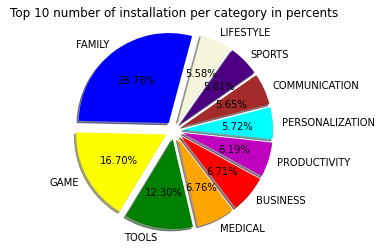

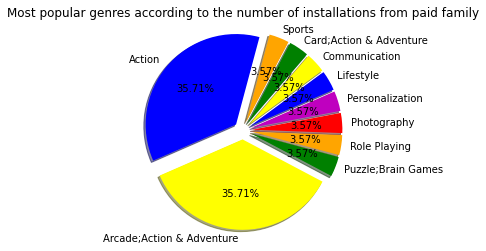

In [15]:
def print_pie_charts(dataset):
    paid = dataset[dataset["Type"] == "Paid"]
    inst = dict(paid.groupby("Genres").Installs.max().sort_values(ascending=False).head(10))
    labels = list(inst.keys())
    colors = ['blue', 'yellow', 'green', 'orange', 'red', 'm']
    sizes = list(inst.values())
    plt.pie(sizes, labels=labels, colors=colors, startangle=75, shadow=True,
            explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%')
    plt.title('Most popular genres according to the number of installations from paid family')
    plt.axis('equal')
    plt.show()
v = dict(df.groupby("Category").Installs.count().sort_values(ascending=False).head(10))
print("Number of installation per category", v)
labels = list(v.keys())
colors = ['blue', 'yellow', 'green', 'orange', 'red', 'm', 'cyan', 'brown', 'indigo', 'beige']
sizes = list(v.values())
plt.pie(sizes, labels=labels, colors=colors, startangle=75, shadow=True,
        explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%')
plt.title('Top 10 number of installation per category in percents')
plt.axis('equal')
plt.show()

print_pie_charts(df)

            Rating   Reviews  Installs     Price
Rating    1.000000  0.068141  0.051355 -0.021903
Reviews   0.068141  1.000000  0.643122 -0.009667
Installs  0.051355  0.643122  1.000000 -0.011689
Price    -0.021903 -0.009667 -0.011689  1.000000


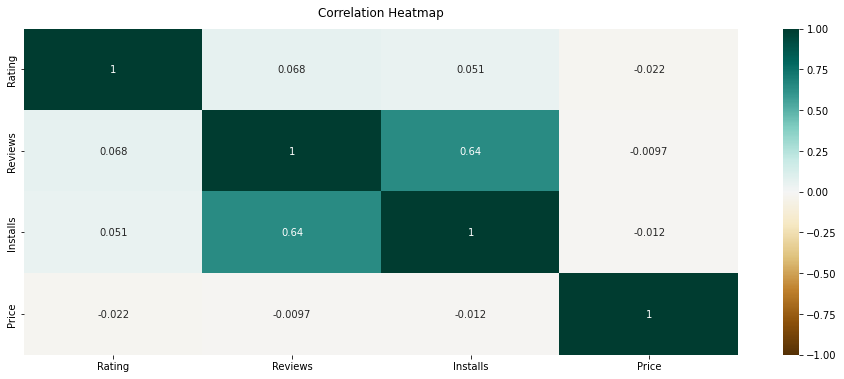

In [16]:
def compute_correlations_matrix(dataset):
    dataset = dataset.set_index('index')
    corr = dataset.corr()
    print(corr)
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True,cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12);
    plt.show()
compute_correlations_matrix(df)

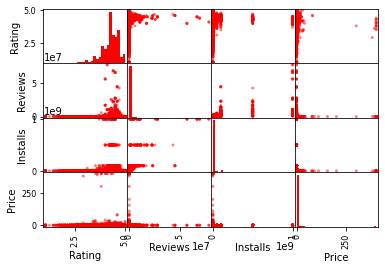

In [17]:
def print_scatter_matrix():
    data = df.set_index('index')
    pd.plotting.scatter_matrix(data, color='red', hist_kwds={'bins': 30, 'color': 'red'})
    plt.show()
print_scatter_matrix()